## Assignment instructions:

### Machine Learning Fashionista

This assignment builds on the pre-class work from [this](https://github.com/minerva-university/cs156/tree/master/session07) week.

It might be useful to read through [this example](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html) before attempting this assignment.

#### Instructions

- Split your dataset from the PCA pre-class work into 80% training data and 20% testing data.
- Build a simple linear classifier using the original pixel data. There are several options that you can try including a [linear SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc) or a [logistic classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression). Both of which will be covered in more detail later in this course.
  - What is your error rate on the training data?
  - What is your error rate on the testing data?
- Train the same linear model as in the question above, but now on the reduced representation that you created using PCA.
  - What is your error rate on the training data?
  - What is your error rate on your testing data?
- Train the same linear model as the first question again, but now on the reduced representation that you created using LDA.
  - What is your error rate on the training data?
  - What is your error rate on your testing data?
- Write three paragraphs describing and interpreting your results from the three models. Make a recommendation on which classifier you would prefer, and why.

Please convert everything to a single PDF file and submit it. Be sure to include all the code necessary to reproduce your results, but please leave out exploratory code that does not contribute to any figures or final results. This assignment is not just about code, and any choices which need justification, or insights you gain should be included in plain English.

### Notes:
**Regarding data pre-processing: there are several ways to load and process image data; the following is just one way if you are feeling lost.**

- Using `listdir` from the `os` module, generate a list of each image's name, path included, for easy passing to an image processor. You might want to use the Python Imaging Library (PIL) to open images.
- *Note:* images are big, so you can't keep so many open in memory at once. Instead, use a loop, and open images one by one, resize to a uniform size, append to an array (`np.asarray()` will extricate the RGB channels from each pixel in the original image), and then call `Image.close()` to free up the used memory.
- You might want to aim for an array of four dimensions: (num-images, height, width, 3) -- where the first dimension is the number of images you use, and the height/width are up to you. The fourth dimension, of size 3, will be RGB values for each pixel.
- Since you will classify the images, you'll need to label them appropriately. There are many ways to do this. One is to save the labels in their own dimension. Another is to save all your data in a Bunch dictionary, which allows dot-accessible attributes (i.e., so you'll save your data as a numpy array as one attribute, labels as another). Look at scikit-learn's toy datasets, e.g., the MNIST digits or iris data, for an example of this. Another option is to put images from one category into its own directory, and images from another category into another directory.
- Eventually, if you are using a scikit-learn implementation of the algorithms (which you needn't do; you could always implement them yourself!), you will need to find a way to make your data scikit compatible. Recommendation: consider reshaping your array to a 2D matrix: (number of images, 3*number of pixels), where in the second dimension, you've spread out your height * width * 3 channels into one long "row" representation.

Later in this course we will revisit this problem using methods which are currently state-of-the-art and significantly improve your results!

## General Report

This assignment includes the implementations of 2DPCA, 3DPCA, and LDA. This report also includes the analysis of the accuracy and the F1 scores. Based on the F1 score evaluation, I discuss how the model is trustworthy and whether that result is expected or not.

3D PCA is for the better understanding on how the data is well-spread or classified.

I splitted the data between 80% of training and 20% of testing. As at the end of the report discusses, trained model has good enough accuracy but still failes on test data set. I believe this is because of overfitting of the model so I tried the experiment again with 20% of training and 80% of testing data set to see whether my hypothesis is correct (of course I tried other parameters too but this gives the best results among the other parameters). After this re-experiment, I observed that the F1 score increases but not that significantly.


In conclusion, I will choose the linear model which I implemented in the first. Before just accepting the first model, I tried more experiments by changing a parameter to split the test/train data but all of the cases that I tried didn't make the second and the third model works better than the linear model. Therefore, for the accuracy reason, I adapt the first linear model.

## Code Experiment Starts Here

In [67]:
# Importing libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

(2802, 12288) (2802,)


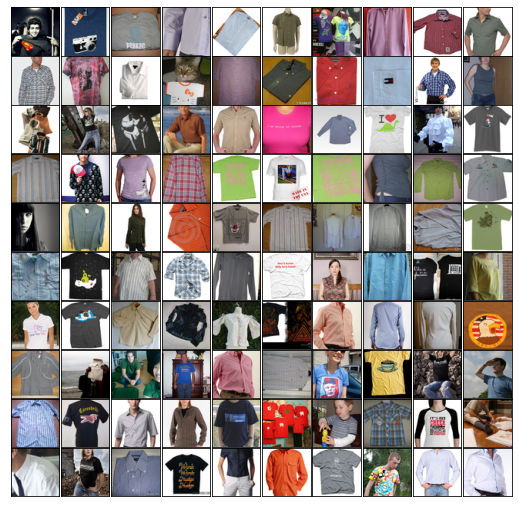

In [68]:
# create paths for all images
jersey_images = glob('Jersey/*')
shirt_images = glob('Shirt/*')

jerseys = []
shirts = []

dim = [64, 64]


# for each image path
for path in jersey_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            jerseys.append(np.array(cover).flatten())

# for each image path
for path in shirt_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            shirts.append(np.array(cover).flatten())

jerseys = np.asarray(jerseys)
shirts = np.asarray(shirts)
#shirts.shape = 200 x 12288 = 200 x 64 x 64 x 3

X = np.concatenate((shirts, jerseys))
Y = np.concatenate((np.zeros(len(shirts)), np.ones(len(jerseys))))
print(X.shape, Y.shape)


fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(dim[0], dim[1], 3))

In [69]:
# Data Set Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

## Simple Logistic Regression Classifier

In [70]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [71]:
predictions = clf.predict(X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1178
         1.0       0.98      0.97      0.98      1063

    accuracy                           0.98      2241
   macro avg       0.98      0.98      0.98      2241
weighted avg       0.98      0.98      0.98      2241



This reports the 0.97 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate.

In [72]:
predictions = clf.predict(X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55       292
         1.0       0.48      0.41      0.44       269

    accuracy                           0.50       561
   macro avg       0.50      0.50      0.50       561
weighted avg       0.50      0.50      0.50       561



This reports the 0.56 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is expected since now we can differentiate jerseys and shirts.

## PCA Reduction and Classification

Showing 9 out of 141 eigenvectors


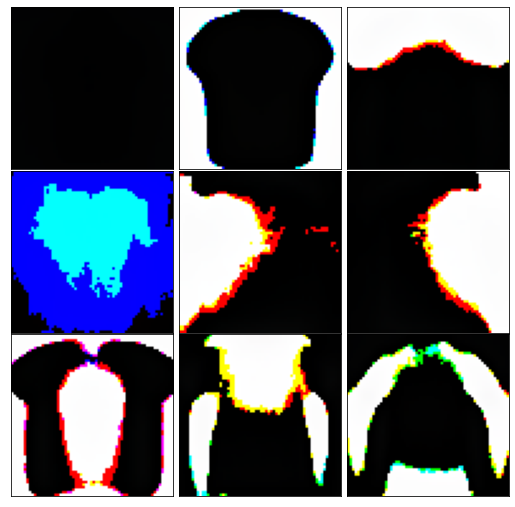

In [73]:
pca = decomposition.PCA(.9)
pca.fit(X_train)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

# Eigen Vectors
print("Showing 9 out of %s eigenvectors" % len(pca.components_))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i].reshape(dim[0], dim[1], 3)*255).astype(np.uint8))

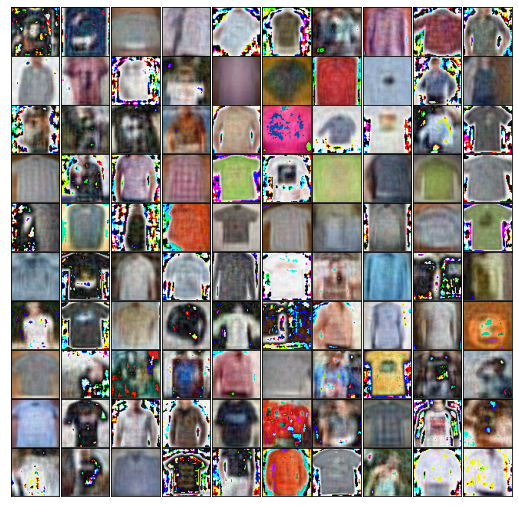

In [74]:
transformed_inputs = pca.transform(X)
rescaled_inputs = pca.inverse_transform(transformed_inputs)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
# Plot images
for i, ax in enumerate(axes.flat):
    ax.imshow((rescaled_inputs[i].reshape(dim[0], dim[1], 3)).astype(np.uint8))


In [75]:
clf_PCA = LogisticRegression(max_iter = 500)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [76]:
PCA_predictions = clf_PCA.predict(PCA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, PCA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69      1178
         1.0       0.66      0.59      0.62      1063

    accuracy                           0.66      2241
   macro avg       0.66      0.66      0.66      2241
weighted avg       0.66      0.66      0.66      2241



This reports the 0.67 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is expected since now we can differentiate jerseys and shirts.

In [77]:
PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66       292
         1.0       0.62      0.50      0.55       269

    accuracy                           0.61       561
   macro avg       0.62      0.61      0.61       561
weighted avg       0.62      0.61      0.61       561



This reports the 0.63 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is expected since now we can differentiate jerseys and shirts.

In [78]:
# PCA but 3D
import numpy as np
from sklearn.decomposition import PCA
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

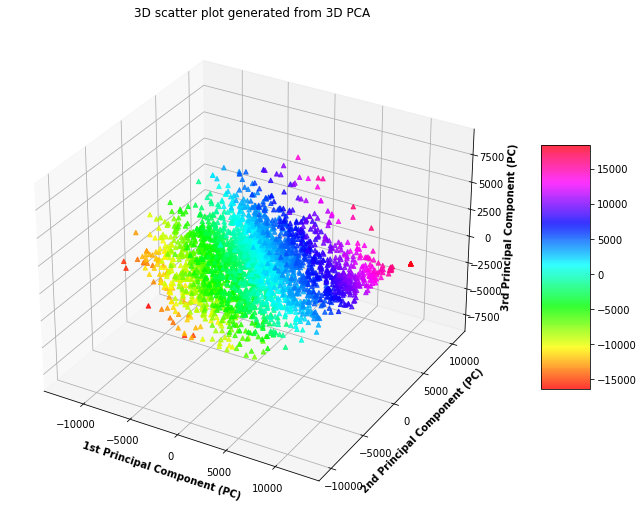

In [79]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv') 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

## LDA Reduction and Classification

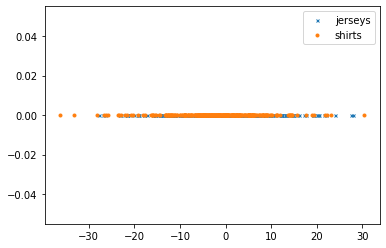

In [80]:
# LDA to reduce it down to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

transformed_jerseys = lda.transform(jerseys)
transformed_shirts = lda.transform(shirts)

plt.plot(transformed_jerseys, [0 for _ in range(len(transformed_jerseys))], 'x', markersize=3, label='jerseys')
plt.plot(transformed_shirts, [0 for _ in range(len(transformed_shirts))], 'o', markersize=3, label='shirts')
plt.legend()
plt.show()


In [81]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = LogisticRegression(max_iter = 500)
clf_LDA.fit(LDA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [82]:
LDA_predictions = clf_LDA.predict(LDA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, LDA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1178
         1.0       1.00      0.95      0.98      1063

    accuracy                           0.98      2241
   macro avg       0.98      0.98      0.98      2241
weighted avg       0.98      0.98      0.98      2241



This reports the 0.98 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is accurate. This is expected since now we verifies that the classification works so now almost fully distinguish jerseys and shirts based on the trained model.

In [83]:
LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       292
         1.0       0.47      0.41      0.44       269

    accuracy                           0.50       561
   macro avg       0.49      0.49      0.49       561
weighted avg       0.49      0.50      0.49       561



This reports the 0.50 of f1 score. F1 score is the harmonic mean of precision and recall; therfore, this shows that the prediction is NOT accurate. This is NOT expected since the trained model had good accuracy but we don't get it from test sets. I think 80% of data is an overfitting.

## Re-experiment with 20% of training and 80% of test data.

## PCA

(2802, 12288) (2802,)


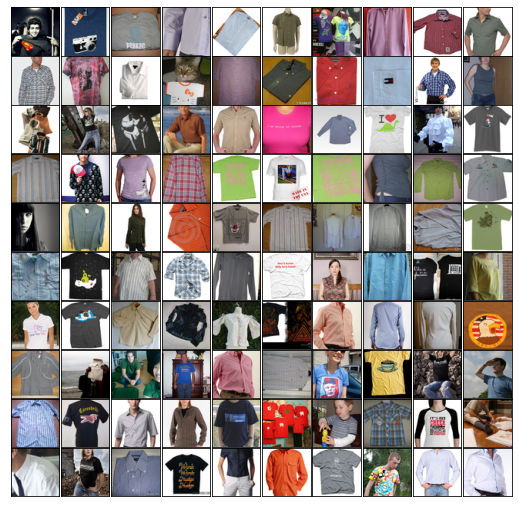

In [84]:
# create paths for all images
jersey_images = glob('Jersey/*')
shirt_images = glob('Shirt/*')

jerseys = []
shirts = []

dim = [64, 64]


# for each image path
for path in jersey_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            jerseys.append(np.array(cover).flatten())

# for each image path
for path in shirt_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # convert image to RGB
            image = image.convert('RGB')
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, dim)
            # flatten the matrix to an array and append it to all flattened images
            shirts.append(np.array(cover).flatten())

jerseys = np.asarray(jerseys)
shirts = np.asarray(shirts)
#shirts.shape = 200 x 12288 = 200 x 64 x 64 x 3

X = np.concatenate((shirts, jerseys))
Y = np.concatenate((np.zeros(len(shirts)), np.ones(len(jerseys))))
print(X.shape, Y.shape)


fig, axes = plt.subplots(10,10,figsize=(9,9),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(dim[0], dim[1], 3))

In [85]:
# Data Set Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.8, shuffle=True)

Showing 9 out of 91 eigenvectors


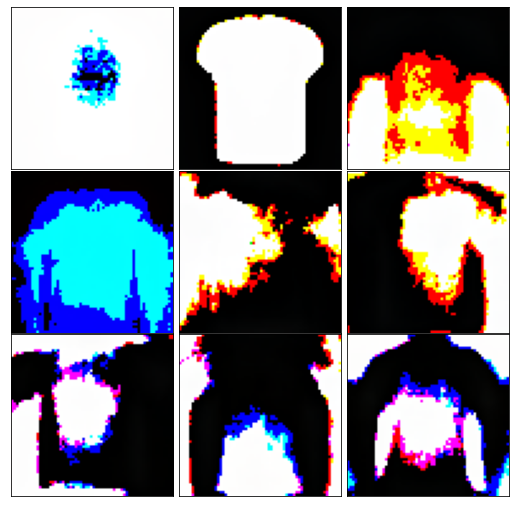

In [86]:
pca = decomposition.PCA(.9)
pca.fit(X_train)

fig, axes = plt.subplots(3, 3,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

# Eigen Vectors
print("Showing 9 out of %s eigenvectors" % len(pca.components_))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i].reshape(dim[0], dim[1], 3)*255).astype(np.uint8))

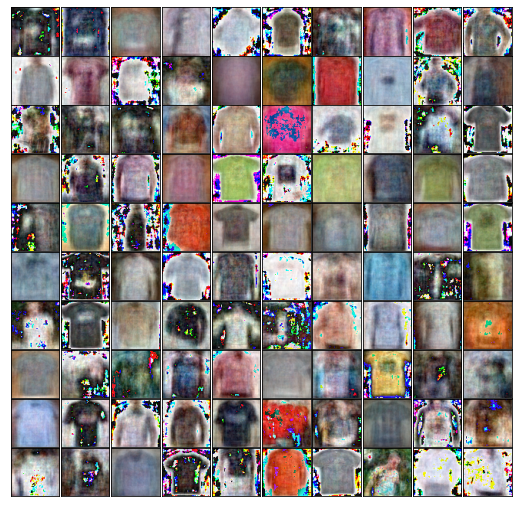

In [87]:
transformed_inputs = pca.transform(X)
rescaled_inputs = pca.inverse_transform(transformed_inputs)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
# Plot images
for i, ax in enumerate(axes.flat):
    ax.imshow((rescaled_inputs[i].reshape(dim[0], dim[1], 3)).astype(np.uint8))


In [88]:
clf_PCA = LogisticRegression(max_iter = 500)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [89]:
PCA_predictions = clf_PCA.predict(PCA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, PCA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       287
         1.0       0.73      0.67      0.70       273

    accuracy                           0.72       560
   macro avg       0.72      0.72      0.72       560
weighted avg       0.72      0.72      0.72       560



In [90]:
PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64      1183
         1.0       0.59      0.52      0.55      1059

    accuracy                           0.60      2242
   macro avg       0.60      0.60      0.60      2242
weighted avg       0.60      0.60      0.60      2242



In [91]:
# PCA but 3D
import numpy as np
from sklearn.decomposition import PCA
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

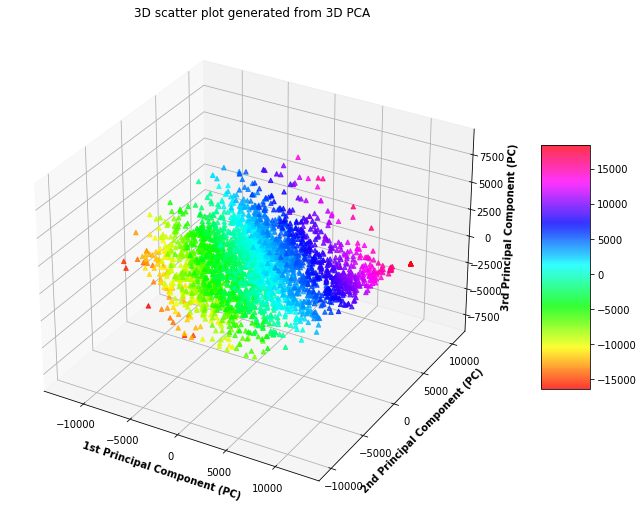

In [92]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv') 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

## LDA Reduction and Classification

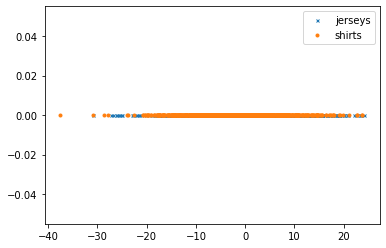

In [93]:
# LDA to reduce it down to 1D
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, Y_train)

transformed_jerseys = lda.transform(jerseys)
transformed_shirts = lda.transform(shirts)

plt.plot(transformed_jerseys, [0 for _ in range(len(transformed_jerseys))], 'x', markersize=3, label='jerseys')
plt.plot(transformed_shirts, [0 for _ in range(len(transformed_shirts))], 'o', markersize=3, label='shirts')
plt.legend()
plt.show()


In [94]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = LogisticRegression(max_iter = 500)
clf_LDA.fit(LDA_X_train, Y_train)


LogisticRegression(max_iter=500)

In [95]:
LDA_predictions = clf_LDA.predict(LDA_X_train)
print("Classification Report on Training Data")
print(classification_report(Y_train, LDA_predictions))

Classification Report on Training Data
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       287
         1.0       1.00      0.99      0.99       273

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



In [96]:
LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions))

Classification Report on Testing Data
              precision    recall  f1-score   support

         0.0       0.57      0.65      0.61      1183
         1.0       0.54      0.46      0.49      1059

    accuracy                           0.56      2242
   macro avg       0.55      0.55      0.55      2242
weighted avg       0.55      0.56      0.55      2242

